# ROC and precision-recall curves

Nuha BinTayyash, 2020

This notebook shows the ROC and precision-recall curves resulted from running GPcounts with one sample test on simulated bulk RNA-seq datasets.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
import pandas as pd

low_counts_low_dispersion_non_differentially_expressed_genes_DE_non_DE_genes.csv


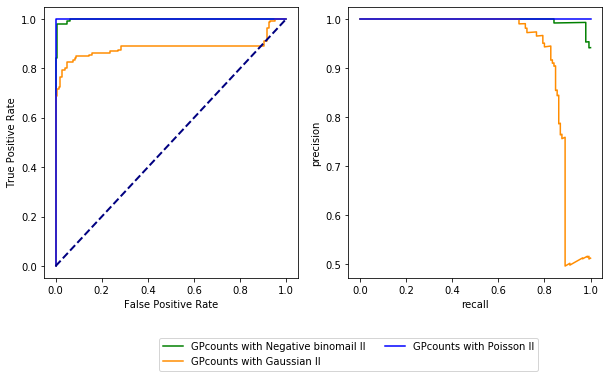

AUC for GPcount with Negative Binomial likelihood 0.9979548156956004
AUC for GPcount with Gaussian likelihood 0.8839001189060642
AUC for GPcount with Poisson likelihood 1.0
low_counts_high_dispersion_non_differentially_expressed_genes_DE_non_DE_genes.csv


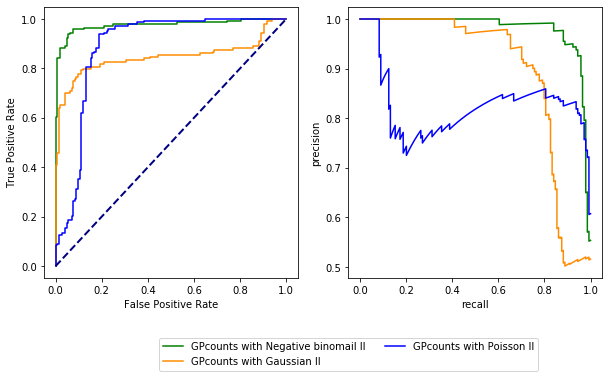

AUC for GPcount with Negative Binomial likelihood 0.9747781635802469
AUC for GPcount with Gaussian likelihood 0.8455343364197531
AUC for GPcount with Poisson likelihood 0.8868152006172839
high_counts_low_dispersion_non_differentially_expressed_genes_DE_non_DE_genes.csv


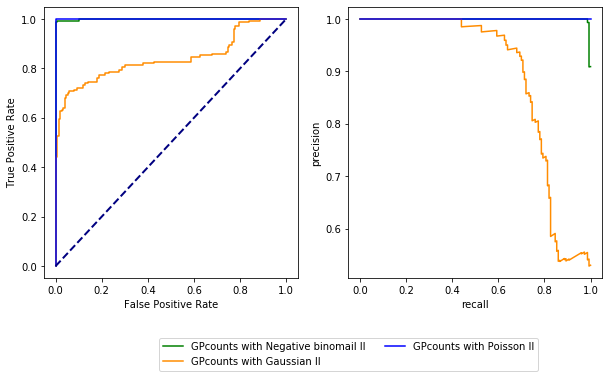

AUC for GPcount with Negative Binomial likelihood 0.9992888888888889
AUC for GPcount with Gaussian likelihood 0.8397777777777777
AUC for GPcount with Poisson likelihood 1.0
high_counts_high_dispersion_non_differentially_expressed_genes_DE_non_DE_genes.csv


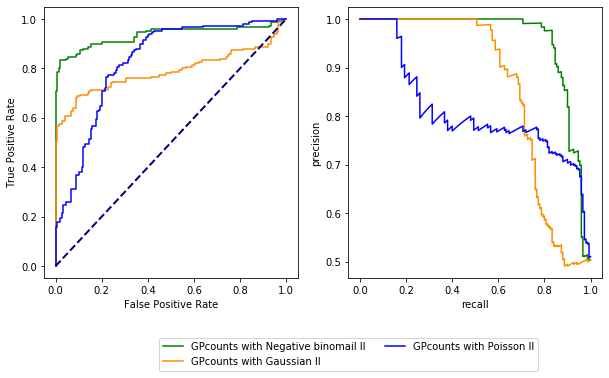

AUC for GPcount with Negative Binomial likelihood 0.934088888888889
AUC for GPcount with Gaussian likelihood 0.7877333333333333
AUC for GPcount with Poisson likelihood 0.8271111111111111


In [2]:
filesname = ['low_counts_low_dispersion_non_differentially_expressed_genes_DE_non_DE_genes.csv'
             ,'low_counts_high_dispersion_non_differentially_expressed_genes_DE_non_DE_genes.csv'                                     
             ,'high_counts_low_dispersion_non_differentially_expressed_genes_DE_non_DE_genes.csv'
             ,'high_counts_high_dispersion_non_differentially_expressed_genes_DE_non_DE_genes.csv']

for file in filesname:
    print(file)
    
    Gaussian = pd.read_csv('ll_Gaussian_'+file,index_col=[0])
    NegativeBinomial = pd.read_csv('ll_Negative_binomial_'+file,index_col=[0])
    Poisson = pd.read_csv('ll_Poisson_'+file,index_col=[0])
    
    D = NegativeBinomial.shape[0]
    true_label = np.zeros(D)
    
    for j in range(D):
        if j %2 == 0:
            true_label[j] = 1

    labels = pd.DataFrame(true_label, index =NegativeBinomial.index.values, columns =['label'])
    NegativeBinomial = pd.concat([NegativeBinomial,labels],axis = 1)

    fig = plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    
    fpr_NB, tpr_NB, thresholds_NB = metrics.roc_curve( NegativeBinomial['label'], NegativeBinomial['log_likelihood_ratio'])
    plt.plot(fpr_NB, tpr_NB,color='green',label='GPcounts with Negative binomail ll')
    fpr_G, tpr_G, thresholds_G = metrics.roc_curve(NegativeBinomial['label'],Gaussian['log_likelihood_ratio'])
    plt.plot(fpr_G, tpr_G, color='darkorange', label='GPcounts with Gaussian ll')

    fpr_P, tpr_P, thresholds_P = metrics.roc_curve( NegativeBinomial['label'], Poisson['log_likelihood_ratio'])
    plt.plot(fpr_P, tpr_P,color='blue',label='GPcounts with Poisson ll')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.subplot(1, 2, 2)
    figsize=(10, 5)
    precision_NB, recall_NB, thresholds_NB = metrics.precision_recall_curve( NegativeBinomial['label'], NegativeBinomial['log_likelihood_ratio'])
    plt.plot( recall_NB,precision_NB,color='green',label='GPcounts with Negative binomail ll')

    precision_G, recall_G, thresholds_G = metrics.precision_recall_curve(NegativeBinomial['label'],Gaussian['log_likelihood_ratio'])
    plt.plot(recall_G, precision_G, color='darkorange', label='GPcounts with Gaussian ll')

    precision_P, recall_P, thresholds_P = metrics.precision_recall_curve( NegativeBinomial['label'], Poisson['log_likelihood_ratio'])
    plt.plot( recall_P,precision_P,color='blue',label='GPcounts with Poisson ll')

    plt.xlabel('recall')
    plt.ylabel('precision')
    
    plt.legend(loc='upper center', bbox_to_anchor=(0.0, -0.2), ncol=2)
    plt.show()
    
    AUC_NB=metrics.auc(fpr_NB, tpr_NB)
    AUC_G=metrics.auc(fpr_G, tpr_G)
    AUC_P=metrics.auc(fpr_P, tpr_P)

    print('AUC for GPcount with Negative Binomial likelihood',AUC_NB)
    print('AUC for GPcount with Gaussian likelihood',AUC_G)
    print('AUC for GPcount with Poisson likelihood',AUC_P)
